Available YOLO V8 Models

| Model                                                                                | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | Speed<br><sup>CPU ONNX<br>(ms) | Speed<br><sup>A100 TensorRT<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>(B) |
| ------------------------------------------------------------------------------------ | --------------------- | -------------------- | ------------------------------ | ----------------------------------- | ------------------ | ----------------- |
| YOLOv8n | 640                   | 37.3                 | 80.4                           | 0.99                                | 3.2                | 8.7               |
| YOLOv8s | 640                   | 44.9                 | 128.4                          | 1.20                                | 11.2               | 28.6              |
| YOLOv8m | 640                   | 50.2                 | 234.7                          | 1.83                                | 25.9               | 78.9              |
| YOLOv8l | 640                   | 52.9                 | 375.2                          | 2.39                                | 43.7               | 165.2             |
| YOLOv8x | 640                   | 53.9                 | 479.1                          | 3.53                                | 68.2               | 257.8             |


In [1]:
!pip install ultralytics==8.0.20
!pip install roboflow

import os
from IPython import display
display.clear_output()

from roboflow import Roboflow
from ultralytics import YOLO

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import ultralytics

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [3]:
HOME = os.getcwd()

!mkdir datasets
%cd datasets

/content/datasets


In [4]:
# Connect to roboflow and download dataset
rf = Roboflow(api_key="<YOUR_API_KEY>")
project = rf.workspace("angel-macwan-6m3sx").project("blood-segmentation")
dataset = project.version(1).download("yolov8")

%cd {HOME}

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to blood-segmentation-1 in yolov8:: 100%|██████████| 209/209 [00:00<00:00, 1550.67it/s]

/content


In [5]:
model_name = 'yolov8m.pt'
data_loc = '/content/datasets/blood-segmentation-1/data.yaml'

In [6]:
pretrained_model = YOLO(model_name)  # load a pretrained detection model

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [7]:
pretrained_model.train(data=data_loc, epochs=30, plots=True, imgsz=256)  # train the model

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/blood-segmentation-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=256, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

## Validate the model

In [8]:
pretrained_model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/blood-segmentation-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                   all         20        481      0.962      0.972      0.989      0.848
                   rbc         20        462      0.943      0.944      0.983       0.81
                   wbc         20         19      0.981          1      0.995      0.885
Speed: 0.3ms pre-process, 24.2ms inference, 0.0ms loss, 1.0ms post-process per image


# Inference the model

In [9]:
# Load saved model (or just use existing model in memory)
# I will be loading saved model for demonsitation

# Remove old model from memory
del pretrained_model

# Load new model
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

In [10]:
# Functions to plot image and bounding boxes
def plot_bbox(bbox, ax, text, color='red'):
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1], text, fontsize=8,
            bbox=dict(facecolor='red', alpha=0.5))

def show_image_with_bboxes(img_path, results):
    # Load the image
    img = plt.imread(img_path)

    # Define the figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the image
    ax.imshow(img)

    # Plot the bounding boxes
    XYXY = results[0].boxes.xyxy.cpu()
    Confidence = results[0].boxes.conf
    Class = results[0].boxes.cls
    for i in range(XYXY.shape[0]):
        bbox = XYXY[i, :]
        text = f"Class {Class[i]} ({Confidence[i]:.2f})"
        plot_bbox(bbox, ax, text)

    # Show the plot
    plt.show()

In [11]:
filePath = '/content/datasets/blood-segmentation-1/valid/images/image-108_png.rf.e7b4224a9052e7542bea688be9c4e056.jpg'

preds = model(filePath)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


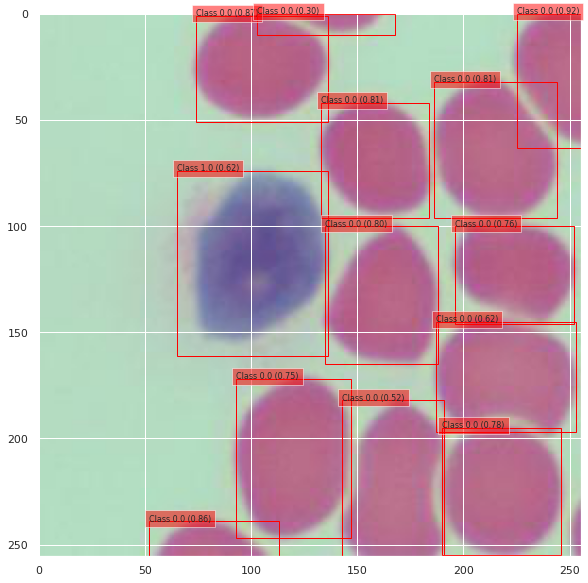

In [12]:
show_image_with_bboxes(filePath, preds)

In [14]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/val/P_curve.png (deflated 16%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 12%)
  adding: content/runs/detect/val/F1_curve.png (deflated 10%)
  adding: content/runs/detect/val/PR_curve.png (deflated 20%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 12%)
  adding: content/runs/detect/val/R_curve.png (deflated 11%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 36%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch100.jpg (deflated 4%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train